In [7]:
library(ggplot2)
library(mgcv)

# C3M4 Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Observe the difference between GAMs and other regression models on simulated data.
2. Review how to plot and interpret the coefficient linearity for GAM models.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [8]:
# Load packages
library(ggplot2)
library(mgcv)

# Problem 1: GAMs with Simulated Data

In this example, we show how to check the validity of a generalized additive model (GAM) (using the `gam()` function) using simulated data. This allows us to try and understand the intricacies of `gam()` without having to worry about the context of the data. 

### 1. (a) Simulate the Data

Let $n = 200$. First, construct three predictor variables. The goal here is to construct a GAM with different types of predictor terms (e.g., factors, continuous variables, some that will enter linearly/parametrically, some that enter transformed).

1. x1: A continuous predictor that, we will suppose has a nonlinear relationship with the response.
2. x2: A categorical variable with three levels: `s`, `m`, and `t`.
3. x3: A categorical variable with two levels: `TRUE` and `FALSE`.

Then, make the response some nonlinear/nonparametric function of $\mathbf{x}$. For our case, use: $$\log(\mu_i) = \beta_1 + \sin(0.5x_{i,1}^2) - x_{i,2} + x_{i,3}$$ This model is a Poisson GAM. In a realworld situation, we wouldn't know this functional relationship and would estimate it. Other terms are modeled parametrically. The response has normal noise.

Note that:

1. The construction of $\boldsymbol\mu = (\mu_1,...,\mu_n)^T$ has the linear predictor exponentiated, because of the nature of the link function. 
2. We use $\boldsymbol\mu$ to construct $\mathbf{y}  = (y_1,...,y_n)^T $. The assumption for Poisson regression is that the random variable $Y_i$ that generates $y_i$ is Poisson with mean $\mu_i$. 
3. `as.integer(as.factor(VARIABLE))` converts the labels of VARIABLE to 1, 2, 3,.. so that we can construct the relationship for these factors.

Plot the relationship of $\mathbf{y}$ to each of the predictors. **Then, split the data into a training (`train_sim`) and test (`test_sim`) set**.

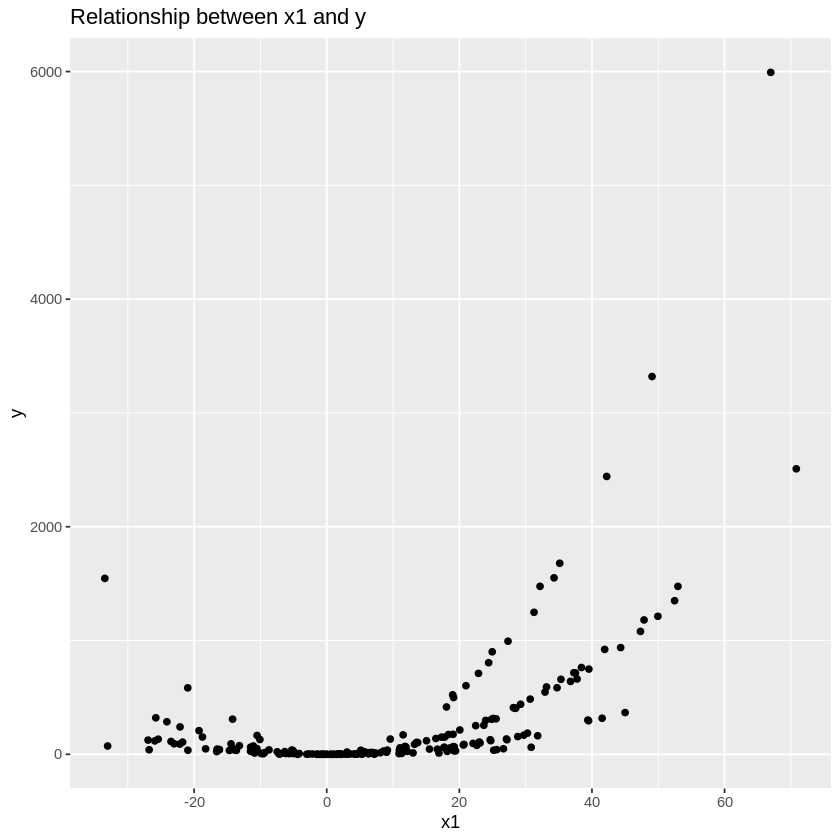

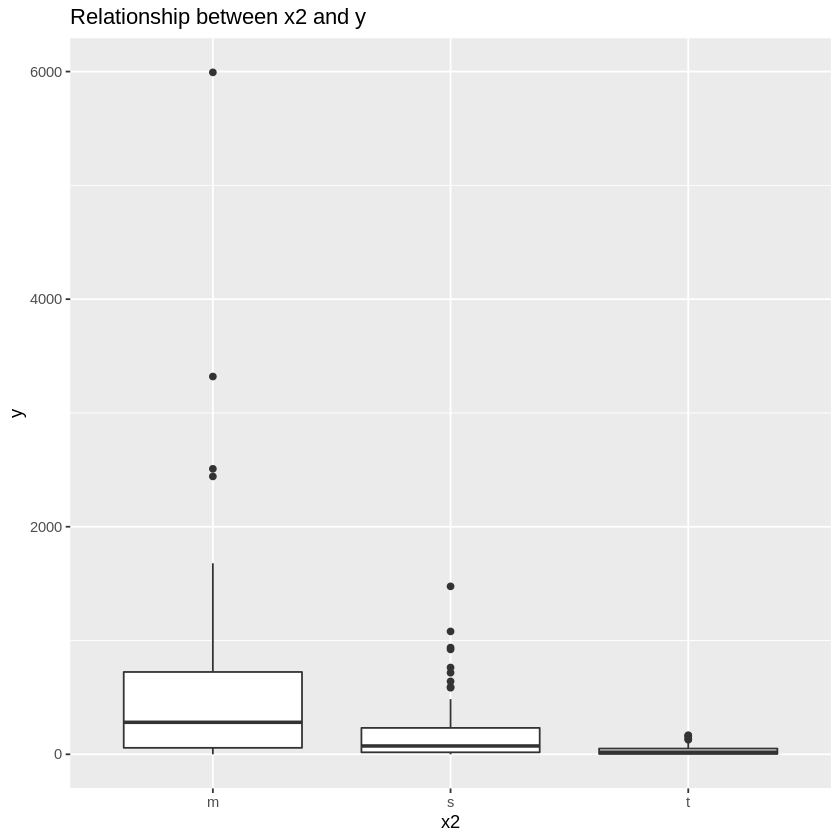

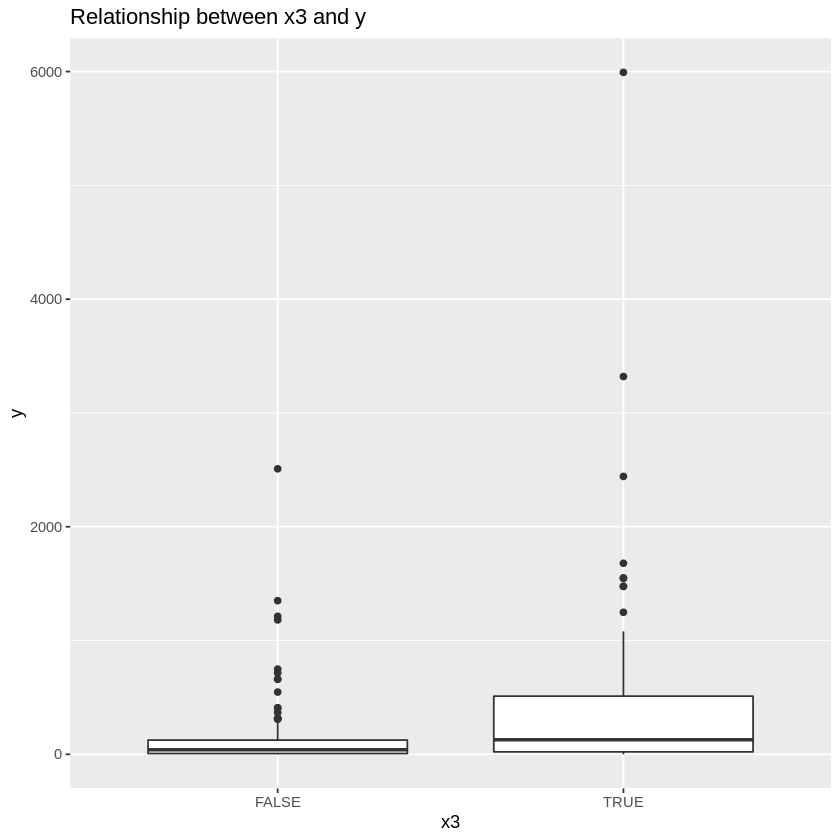

In [9]:
set.seed(0112358)
# n = number of data points
n = 200

x1 <- rnorm(n, 10, 20)  # A continuous predictor that, we will suppose has a nonlinear relationship with the response.
x2 <- as.factor(sample(c("s", "m", "t"), n, replace = TRUE))  #  A categorical variable with three levels: s, m, and t.
x3 <- sample(c(TRUE, FALSE), n, replace = TRUE)  # A categorical variable with two levels: TRUE and FALSE.

df <- data.frame(x1 = x1, x2 = x2, x3 = x3)

df$mu = with(df, exp(log(0.5*x1^2) - as.integer(as.factor(x2))+ as.integer(as.factor(x3))))
df$y <- rpois(n, df$mu)




# Plot the relationships
ggplot(df, aes(x = x1, y = y)) + geom_point() + ggtitle("Relationship between x1 and y")
ggplot(df, aes(x = x2, y = y)) + geom_boxplot() + ggtitle("Relationship between x2 and y")
ggplot(df, aes(x = x3, y = y)) + geom_boxplot() + ggtitle("Relationship between x3 and y")

# Split the data into training and test sets
set.seed(456)
train_indices <- sample(n, n * 0.7)
train_sim <- df[train_indices, ]
test_sim <- df[-train_indices, ]

### 1. (b) Other Regression Models

Before jumping straight into GAMs, let's test if other regression models work. What about a regular linear regression model with ordinary least squares, and a generalized linear model for Poisson regression?

First fit a linear regression model to your `train_sim` data. We know that all of the predictors were used to make the response, but are they all significant in the linear regression model? Explain why this may be.

Then fit a Generalize Linear Model (GLM) to the `train_sim` data. Plot three diagnostic plots for your GLM:

1. Residual vs. log(Fitted Values)
2. QQPlot of the Residuals
3. Actual Values vs. Fitted Values

Using these plots, determine whether this model is a good fit for the data. Make sure to explain your conclusions and reasoning.


Call:
lm(formula = y ~ x1 + x2 + x3, data = train_sim)

Residuals:
   Min     1Q Median     3Q    Max 
-640.7 -241.5 -116.0  162.3 4395.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  371.516    101.795   3.650 0.000374 ***
x1            14.900      2.247   6.630 7.37e-10 ***
x2s         -450.220    110.995  -4.056 8.39e-05 ***
x2t         -532.428    118.094  -4.509 1.40e-05 ***
x3TRUE       228.607     91.038   2.511 0.013215 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 533.9 on 135 degrees of freedom
Multiple R-squared:  0.4174,	Adjusted R-squared:  0.4001 
F-statistic: 24.18 on 4 and 135 DF,  p-value: 4.254e-15


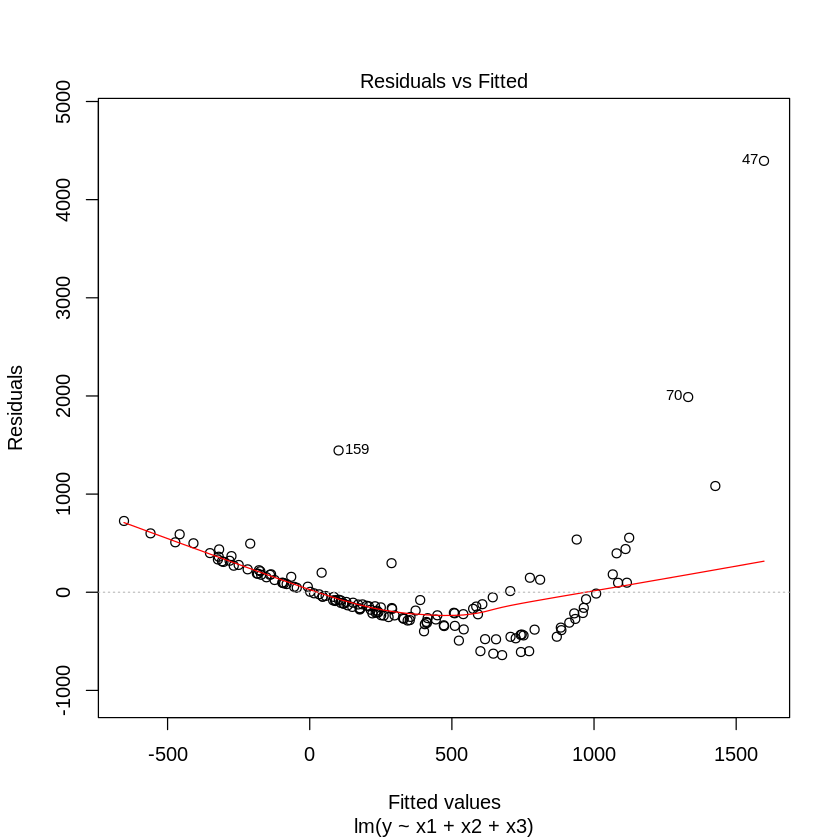

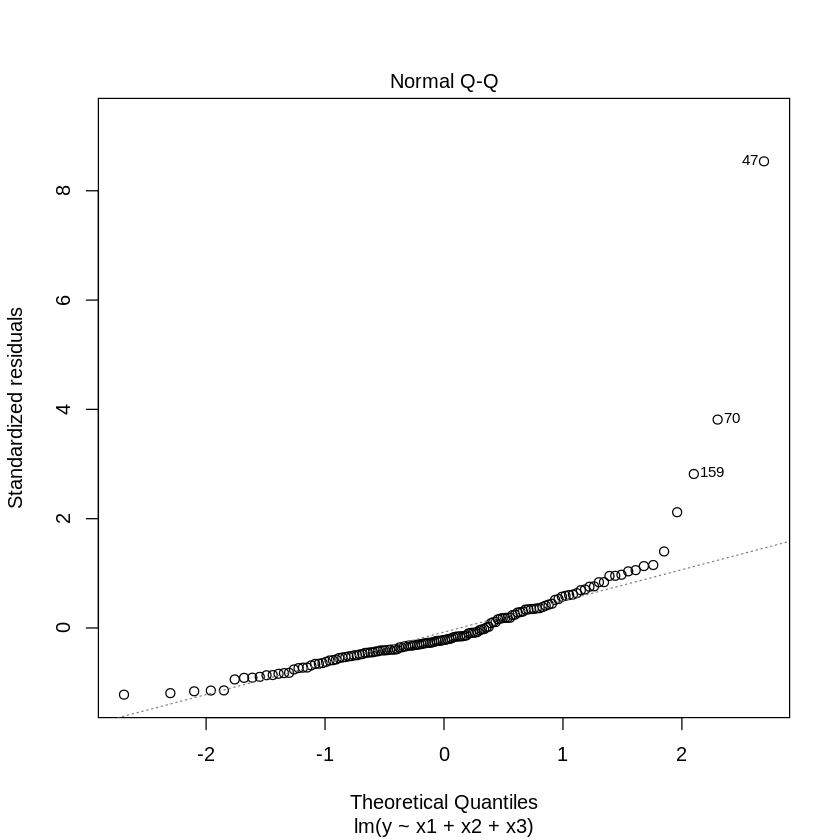

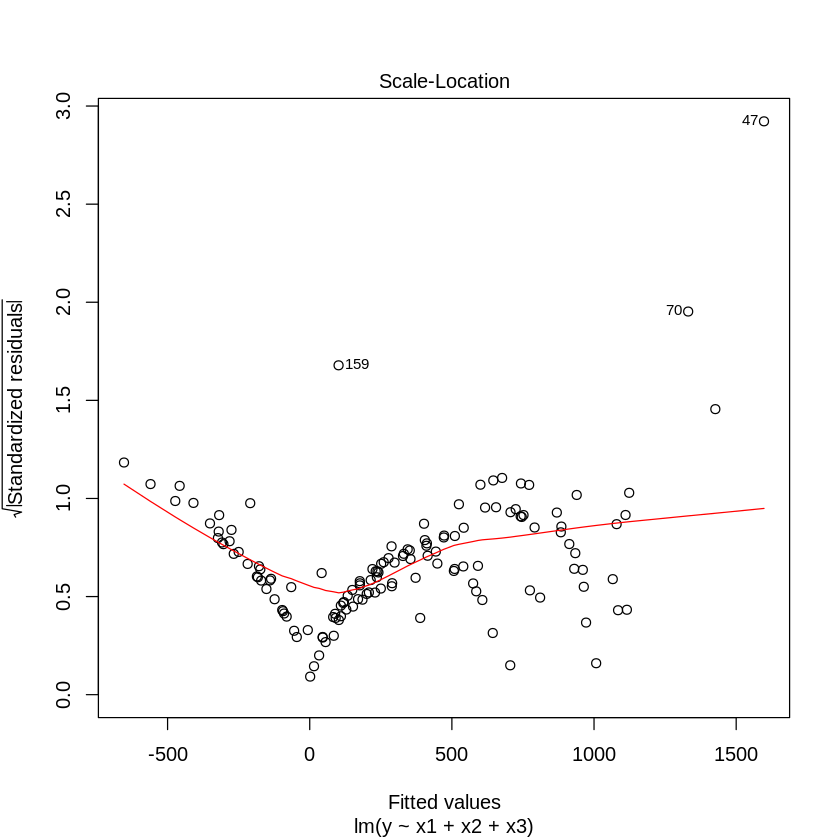


Call:
glm(formula = y ~ x1 + x2 + x3, family = "poisson", data = train_sim)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-25.715   -6.820   -2.159    3.011   79.207  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.7960853  0.0131072  365.91   <2e-16 ***
x1           0.0428751  0.0002279  188.15   <2e-16 ***
x2s         -1.0505389  0.0118364  -88.75   <2e-16 ***
x2t         -2.1998088  0.0240617  -91.42   <2e-16 ***
x3TRUE       1.0042059  0.0106492   94.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 101605  on 139  degrees of freedom
Residual deviance:  17494  on 135  degrees of freedom
AIC: 18311

Number of Fisher Scoring iterations: 5


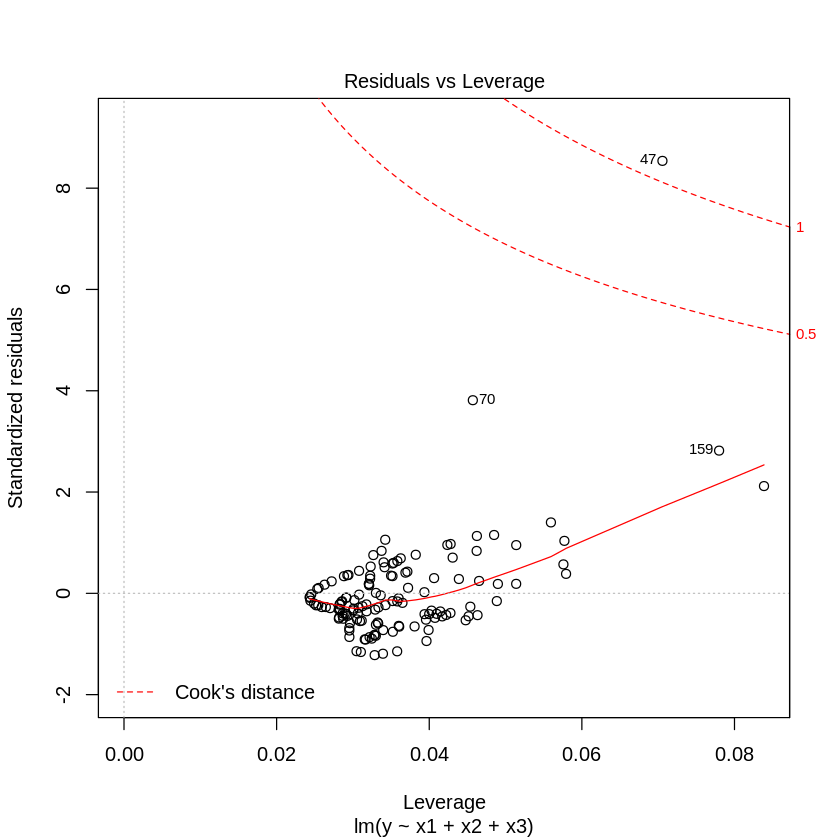

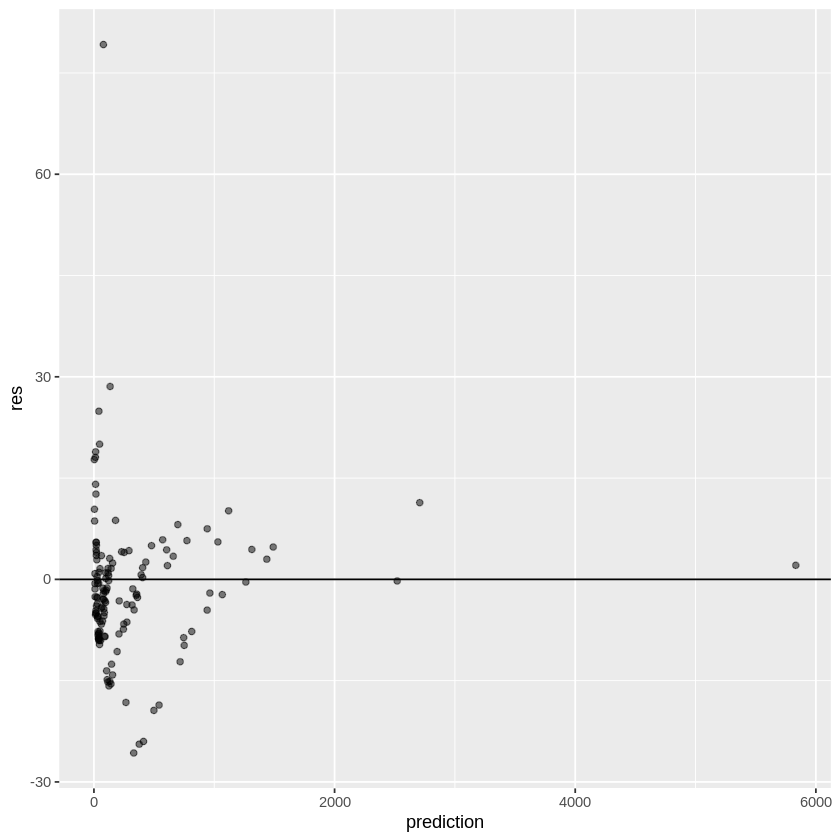

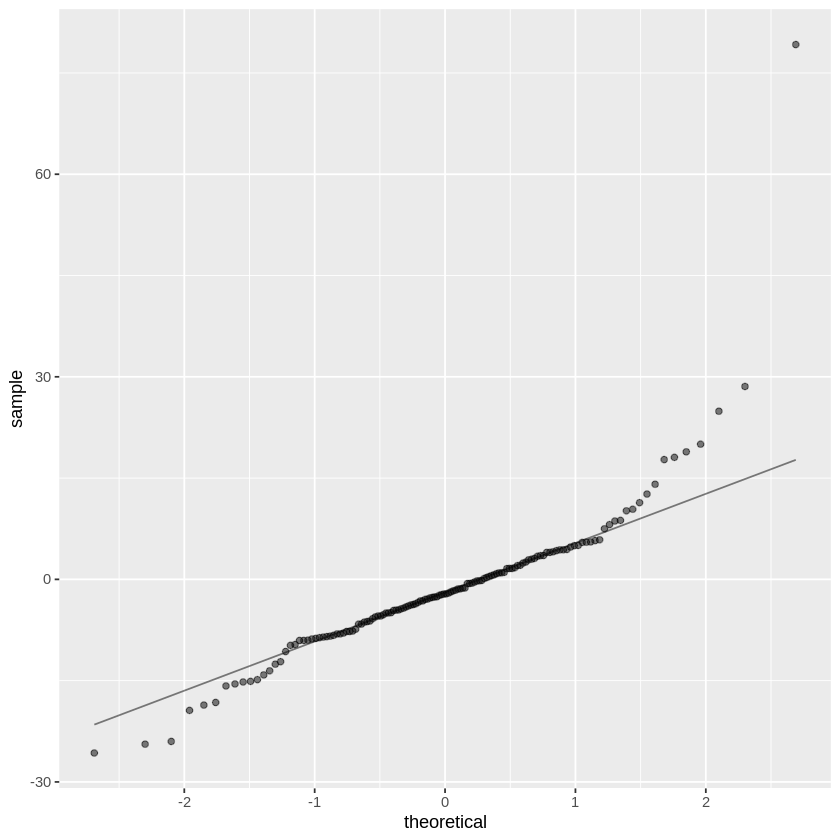

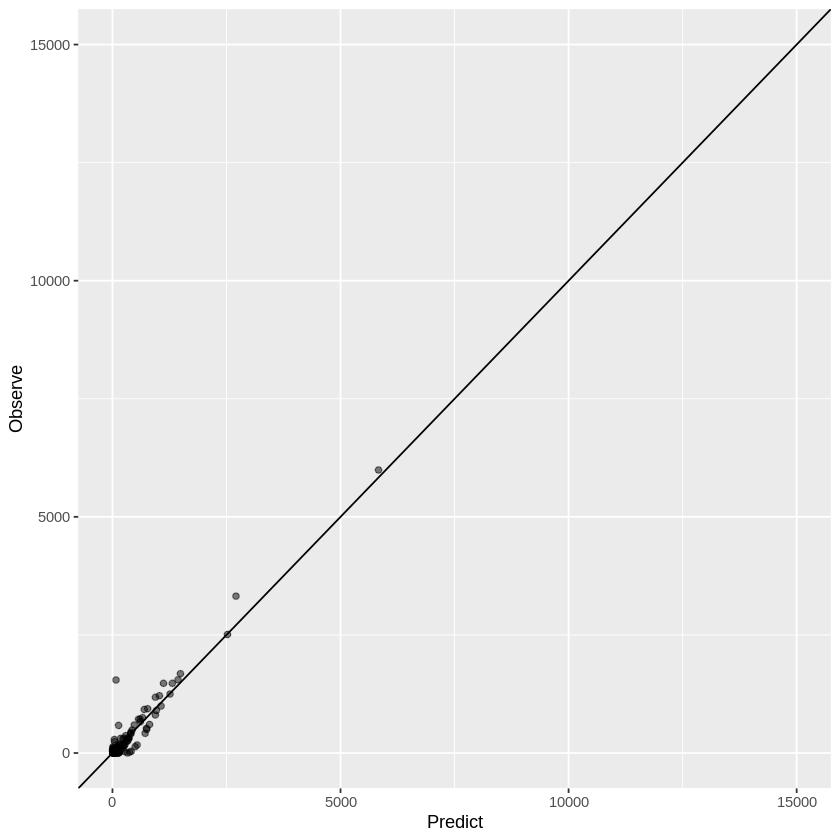

In [10]:
# Fit a LM model to the data

linear_model <- lm(y ~ x1 + x2 + x3, data = train_sim)
summary(linear_model)
plot(linear_model)

# Fit a GLM model to the data

glm_model <- glm(y ~ x1 + x2 + x3, data = train_sim, family = "poisson")
summary(glm_model)

#residual plot
res = residuals(glm_model, type="deviance")
prediction = predict(glm_model, type = "response")

d_glm = data.frame(prediction, res,y = train_sim$y)

#residual vs fitted plot
ggplot(d_glm,aes(prediction, res)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = 0) 
## qqplot
ggplot(d_glm,aes(sample = res)) +
    stat_qq( alpha = 0.5)+
    stat_qq_line( alpha = 0.5) 
#fitted vs actual
ggplot(d_glm,aes(prediction,y)) +
    geom_point(alpha = 0.5) +
    geom_abline(slope=1) +
    xlim(c(0,15000)) +
    ylim(c(0,15000)) +
    xlab("Predict") +
    ylab("Observe")

Linear model looks significant, but could be off
GLM looks a little better, but the QQ plot and observed v predicted looks off

### 1. (c) Looking for those GAMs

Now, it's time to see how a generalized additive model (GAM) performs! Fit a GAM to the data. Construct the same three plots for your GAM model. Do these plots look better than those of the GLM?

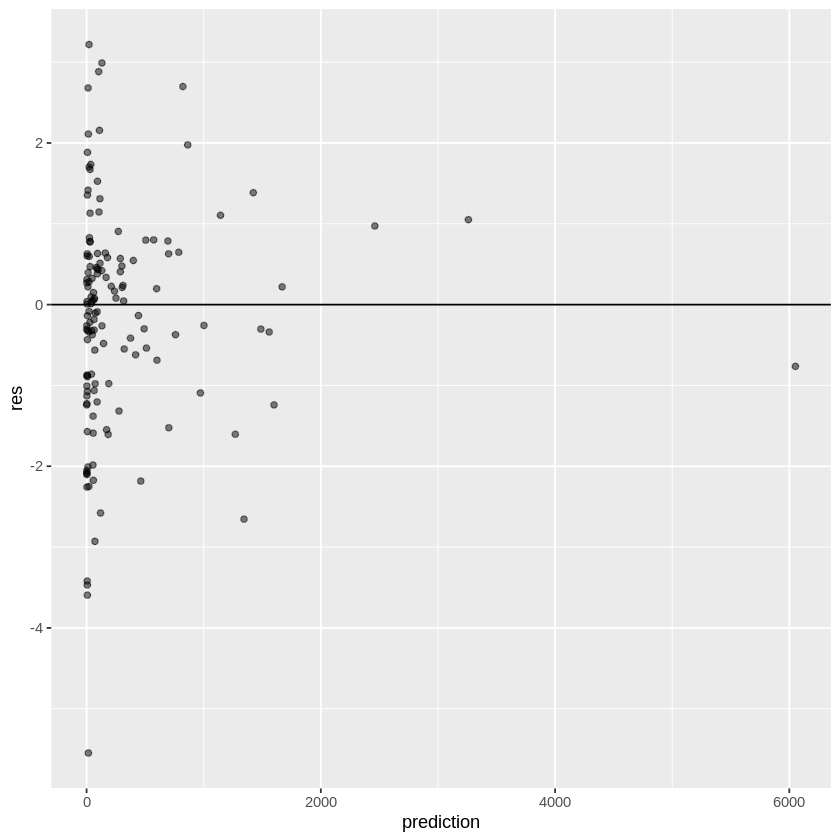

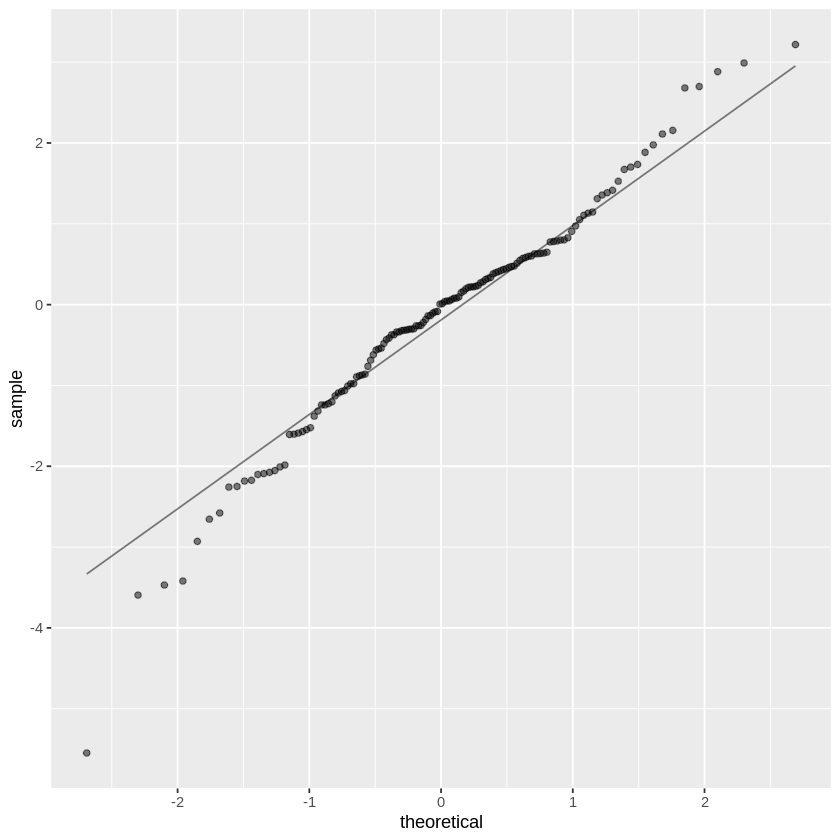

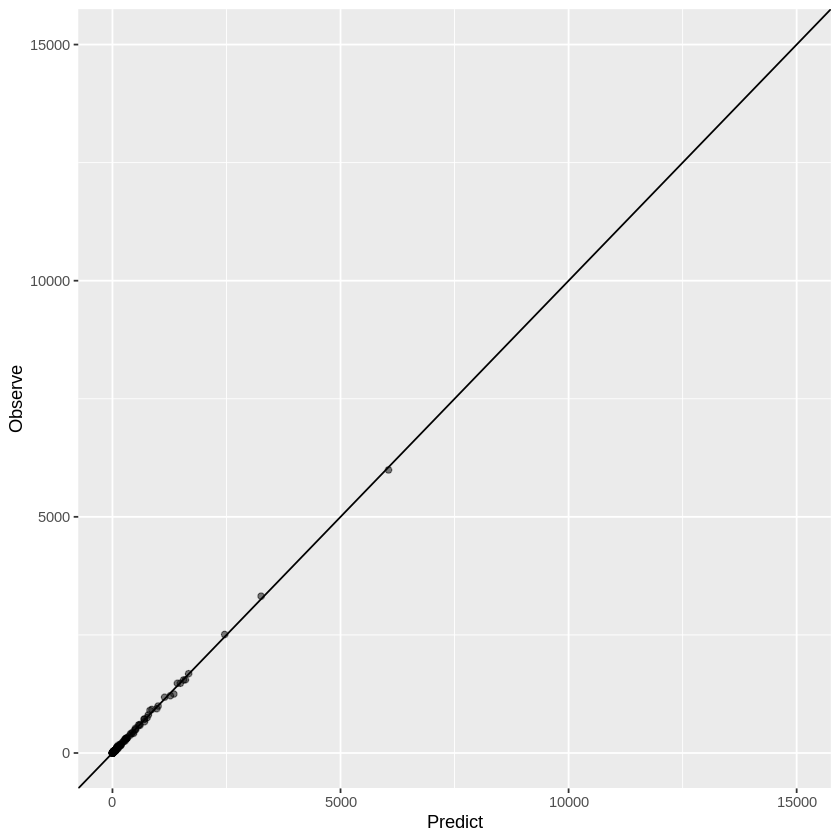

In [11]:
# Fit a GAM model to the data

gam_model <- gam(y ~ s(x1) + x2 + x3, data = train_sim, family = poisson())
res = residuals(gam_model, type="deviance")
prediction = predict(gam_model, type = "response")

d_gam = data.frame(prediction, res,y = train_sim$y)

#residual vs fitted plot
ggplot(d_gam,aes(prediction, res)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = 0) 
## qqplot
ggplot(d_gam,aes(sample = res)) +
    stat_qq( alpha = 0.5)+
    stat_qq_line( alpha = 0.5) 
#fitted vs actual
ggplot(d_gam,aes(prediction,y)) +
    geom_point(alpha = 0.5) +
    geom_abline(slope=1) +
    xlim(c(0,15000)) +
    ylim(c(0,15000)) +
    xlab("Predict") +
    ylab("Observe")

this looks much better!

### 1. (d) Interpreting GAMs

We made a GAM model! However GAMs are harder to interpret than regular linear regression models. How do we determine if a GAM model was necesary? Or, in other words, how do we determine if our predictors have a linear relationship with the response?

Use the `plot.gam()` function in the mgcv library to plot the relationship between `y` and `x1`. Recall that $x_1$ entered our model as $\sin(0.5x_{i,1}^2)$, and we plotted that relationship in **1.(a)**. Does your plot confirm this relationship?

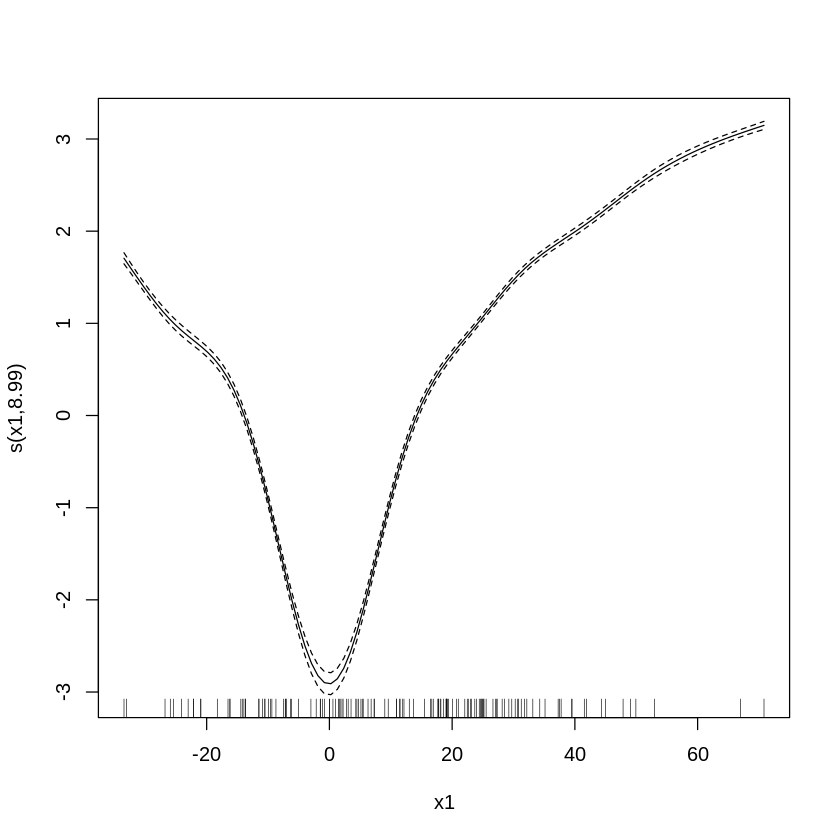

In [12]:
plot.gam(gam_model)

looks how we would expect!

### 1.(e) Model comparison

Compute the mean squared prediction error (MSPE) for each of the three models above (regression model, GLM, and GAM). State which model performs based according to this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

In [13]:
#mspe for lm
p_lm = predict(linear_model, test_sim)
mspe_lm = mean((test_sim$y - p_lm)^2)
mspe_lm;'LM'

#mspe for glm
p_glm = predict(glm_model, test_sim, type = "response")
mspe_glm = mean((test_sim$y - glm_predict)^2)
mspe_glm;'GLM'

# mspe for gam
p_gam = predict(gam_model, test_sim, type = "response")
mspe_gam = mean((test_sim$y - p_gam)^2)
mspe_gam;'GAM'

[1] 118542.2

[1] "LM"

ERROR: Error in mean((test_sim$y - glm_predict)^2): object 'glm_predict' not found


GAM lowest!

# Problem 2 Additive models with the advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


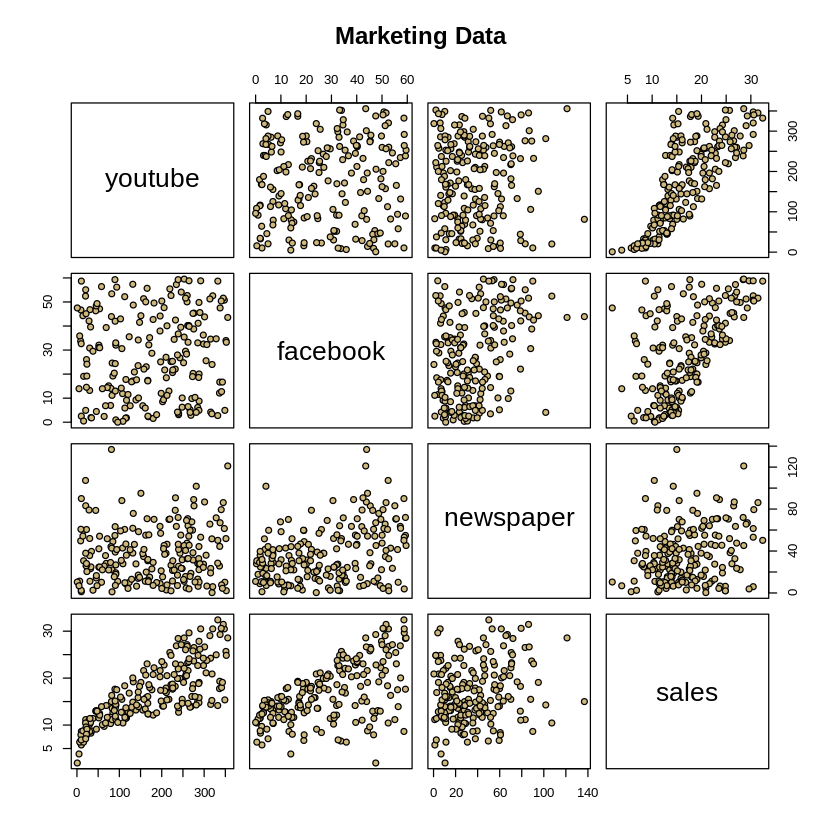

In [14]:
# Load in the data
marketing = read.csv("marketing.txt", sep = "")
head(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [19]:
set.seed(177) 
n = floor(0.8 * nrow(marketing))
index = sample(seq_len(nrow(marketing)), size = n)
train_marketing = marketing[index, ] 
test_marketing = marketing[-index, ] 


**2.(a) Let's try a GAM on the marketing data!**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. In the last module, we focused on modeling the relationship between `sales` and `youtube`, omitting the other variables. Now it's time to include the additional predictors.

Using the `train_marketing` fit an additive model to the data and store it in `gam_marketing`. Produce the relevant added variable plots using `plot(gam_marketing)`. Comment on the fit of the model.


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + s(facebook) + s(newspaper)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.5743     0.1321   125.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df       F p-value    
s(youtube)   6.037  7.127 201.356  <2e-16 ***
s(facebook)  1.000  1.000 481.319  <2e-16 ***
s(newspaper) 1.000  1.000   0.593   0.442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.929   Deviance explained = 93.3%
GCV = 2.9572  Scale est. = 2.7902    n = 160

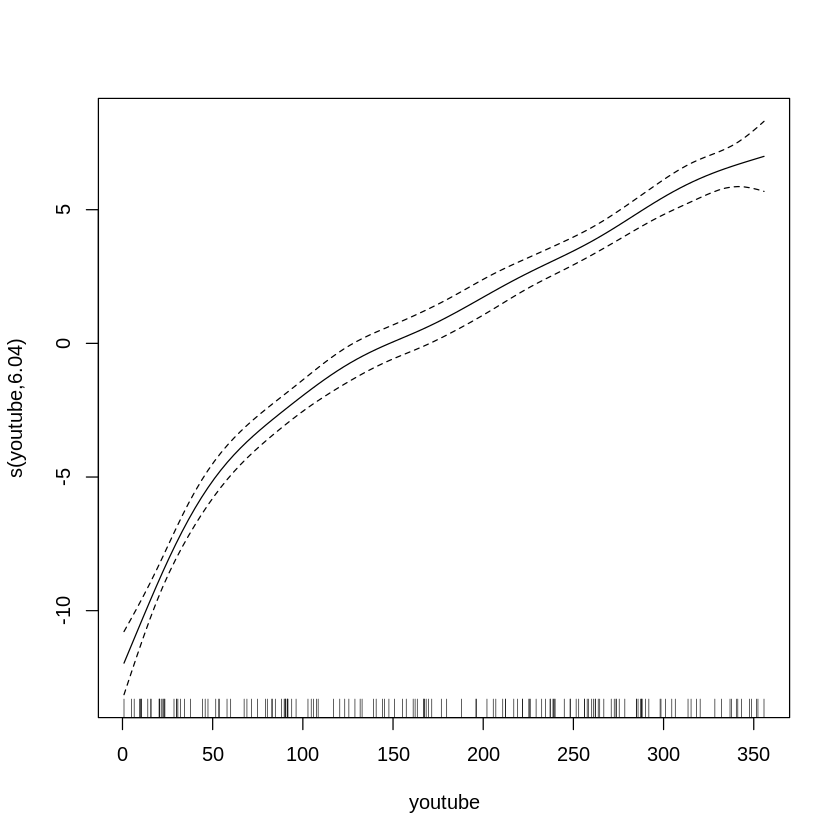

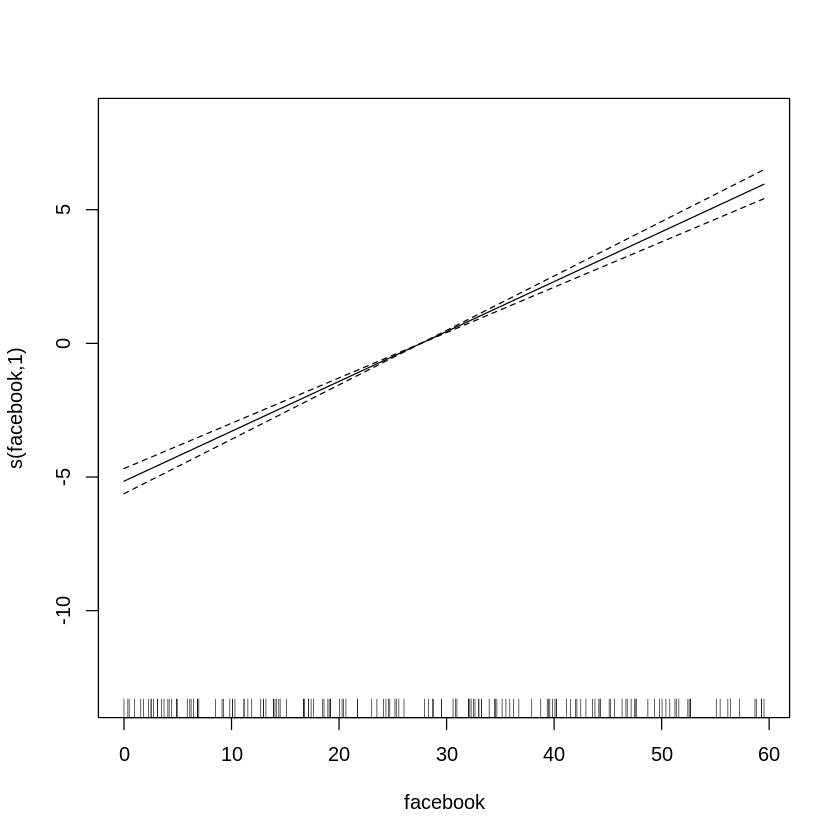

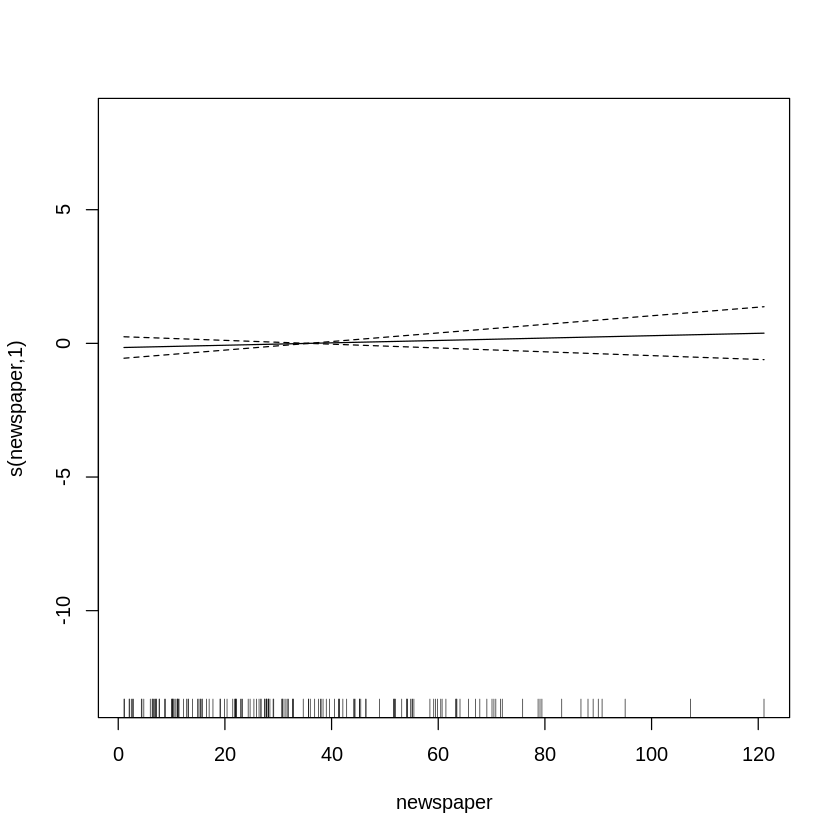

In [20]:
gam_marketing = gam(sales ~ s(youtube) + s(facebook) + s(newspaper), data = train_marketing)
summary(gam_marketing)
plot(gam_marketing)

facebook and newspaper DOF are ~1 so they're probably linear to begin with. 

**2.(b) Semiparametric modeling of the marketing data**

Refit the additive model based on your results from 2.(a). That is, if any predictors above should enter linearly, refit the model to reflect that. If any predictors are statistically insignificant, remove them from the model. Store your final model in `semiparametric_marketing`.

In [21]:
semiparametric_marketing = gam(sales ~ s(youtube) + facebook + newspaper, data = marketing)
summary(semiparametric_marketing)


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + facebook + newspaper

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.3705531  0.2515706  45.198   <2e-16 ***
facebook     0.1958493  0.0073130  26.781   <2e-16 ***
newspaper   -0.0003011  0.0049641  -0.061    0.952    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value    
s(youtube) 6.347  7.499 214.2  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.926   Deviance explained = 92.9%
GCV = 3.0299  Scale est. = 2.8883    n = 200

newspaper is insignificant

In [22]:
semiparametric_marketing = gam(sales ~ s(youtube) + facebook, data= marketing)
summary(semiparametric_marketing)


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + facebook

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.363835   0.225319   50.43   <2e-16 ***
facebook     0.195695   0.006834   28.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value    
s(youtube) 6.365  7.516 215.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.927   Deviance explained = 92.9%
GCV = 2.9985  Scale est. = 2.8731    n = 200

**2.(c) Model comparisons**

Now, let's do some model comparisons on the test data. Compute the mean squared prediction error (MSPE) on the `test_marketing` data for the following three models:

- `gam_marketing` from 2.(a)


- `semiparametric_marketing`from 2.(b)


- `lm_marketing`, a linear regression model with `sales` is the response and `youtube` and `facebook` are predictors (fit on the `train_marketing` data).

State which model performs based according to this metric.

In [23]:
gam_predict = predict(gam_marketing, test_marketing)
mspe_gam = mean((test_marketing$sales - gam_predict)^2);

semiparametric_predict = predict(semiparametric_marketing, test_marketing)
mspe_semiparametric = mean((test_marketing$sales - semiparametric_predict)^2);

lm_marketing = lm(sales ~ youtube + facebook, data = train_marketing)
lm_predict = predict(lm_marketing, test_marketing)
mspe_lm = mean((test_marketing$sales - lm_predict)^2);


#mspe for gam
mspe_gam; 'mspe for gam'

#mspe for semiparametric
mspe_semiparametric; 'mspe for semiparametric'

# mspe for lm
mspe_lm; 'mspe for lm'

[1] 3.438202

[1] "mspe for gam"

[1] 3.054544

[1] "mspe for semiparametric"

[1] 4.197701

[1] "mspe for lm"

LM is the highest so it's definitely better as a gam or semiparametric